In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("framingham.csv")
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.25,shuffle=True)
train_data = pd.concat([X_train,y_train],axis=1)
test_data = pd.concat([X_test,y_test],axis=1)

**Missing Values** Checking Missing values can be done before EDA or after EDA. But before EDA, it will impute or drop missing values for all features, whether some features are needed or not

And after EDA, we choose the features which are needed and those features only get imputed.

Also, the steps best for model preparation is : EDA -> Preprocessing (Missing values, Outliers, Normalise etc.) -> Model Fitting and Prediction

Maximum missing percentage is 9% approx so imputation will be done

In [ ]:
# Resampling

# gives an array of number of null values in eacj col
missing_values_count = train_data.isnull().sum()
# data.shape[0] gives the number of rows
missing_values_percent = (missing_values_count * 100) / (train_data.shape[0])
#print(max(missing_values_percent))

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

new_data = pd.DataFrame(imputer.fit_transform(train_data))
new_data.head()
new_data.columns = train_data.columns
new_data.index = train_data.index

train_data.isnull().sum()

train_data = new_data.copy()
train_data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

**RESAMPLING**

In [ ]:
from imblearn.over_sampling import SMOTE
binary_feature_indices = [0,5,6,7,8]
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
smote = SMOTE(sampling_strategy='auto',random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)
X_train_os = pd.DataFrame(X_resampled)
X_train_os.iloc[:, binary_feature_indices] = np.round(X_train_os.iloc[:, binary_feature_indices])
y_resampled = np.round(y_resampled)
y_train_os = pd.DataFrame(y_resampled)
train_data = pd.concat([X_train_os,y_train_os],axis=1)
train_data["TenYearCHD"].value_counts()
train_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,134.0,85.0,23.64,70.0,86.0,0.0
1,0.0,57.0,2.0,1.0,10.0,0.0,0.0,1.0,0.0,238.0,133.0,72.0,18.09,100.0,115.0,0.0
2,0.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,116.0,79.0,28.59,93.0,87.0,0.0
3,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
4,0.0,51.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,352.0,136.5,87.0,25.79,73.0,67.0,0.0


**Train_data**

0.0    2698
1.0    2698
Name: TenYearCHD, dtype: int64

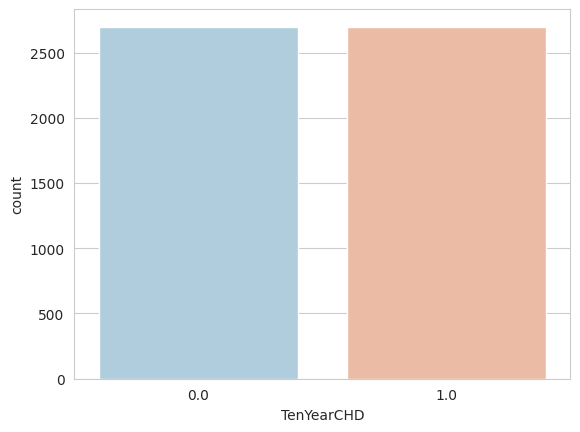

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='TenYearCHD',data=train_data,palette='RdBu_r')
train_data["TenYearCHD"].value_counts()

In [ ]:
train_data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0.0,63.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,134.0,85.0,23.64,70.0,86.0,0.0
1,0.0,57.0,2.0,1.0,10.0,0.0,0.0,1.0,0.0,238.0,133.0,72.0,18.09,100.0,115.0,0.0
2,0.0,45.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,116.0,79.0,28.59,93.0,87.0,0.0
3,0.0,46.0,3.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
4,0.0,51.0,1.0,1.0,15.0,0.0,0.0,0.0,0.0,352.0,136.5,87.0,25.79,73.0,67.0,0.0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5396 entries, 0 to 5395
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             5396 non-null   float64
 1   age              5396 non-null   float64
 2   education        5396 non-null   float64
 3   currentSmoker    5396 non-null   float64
 4   cigsPerDay       5396 non-null   float64
 5   BPMeds           5396 non-null   float64
 6   prevalentStroke  5396 non-null   float64
 7   prevalentHyp     5396 non-null   float64
 8   diabetes         5396 non-null   float64
 9   totChol          5396 non-null   float64
 10  sysBP            5396 non-null   float64
 11  diaBP            5396 non-null   float64
 12  BMI              5396 non-null   float64
 13  heartRate        5396 non-null   float64
 14  glucose          5396 non-null   float64
 15  TenYearCHD       5396 non-null   float64
dtypes: float64(16)
memory usage: 674.6 KB


In [ ]:
train_data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000,5396.000000
mean,0.475723,51.415698,1.885649,0.502243,9.507264,0.043180,0.007969,0.383803,0.036879,239.628857,136.597261,84.520856,26.042595,76.323828,82.736690,0.500000
std,0.499457,8.308150,0.953575,0.483568,11.932529,0.203281,0.088920,0.486356,0.188483,45.044177,23.248883,12.175060,3.880343,11.513792,26.214990,0.500046
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,119.000000,83.500000,50.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,45.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,210.000000,120.000000,76.000000,23.430000,68.139589,73.000000,0.000000
50%,0.000000,51.483228,1.861607,0.528492,2.000000,0.000000,0.000000,0.000000,0.000000,237.341603,131.657284,83.000000,25.776337,75.000000,77.029295,0.500000
75%,1.000000,58.000000,2.426674,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,265.840120,149.225425,91.493582,28.175038,83.000000,86.344022,1.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,244.000000,140.000000,45.800000,143.000000,394.000000,1.000000


In [ ]:
# education feature is not required as its not predicting the Ten Year CHD
# target is Ten Year CHD (0 or 1)
# inplace is true means removing is done on the current dataframe
# aixs = 1 means columns
train_data.drop('education',axis=1, inplace=True)

In [ ]:
# renaming TenYearCHD to CHD
train_data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [ ]:
train_data.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,CHD
0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,0.0,276.0,134.0,85.0,23.64,70.0,86.0,0.0
1,0.0,57.0,1.0,10.0,0.0,0.0,1.0,0.0,238.0,133.0,72.0,18.09,100.0,115.0,0.0
2,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,250.0,116.0,79.0,28.59,93.0,87.0,0.0
3,0.0,46.0,1.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,84.0,23.10,85.0,85.0,0.0
4,0.0,51.0,1.0,15.0,0.0,0.0,0.0,0.0,352.0,136.5,87.0,25.79,73.0,67.0,0.0


**EDA**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='CHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 57.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 29.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


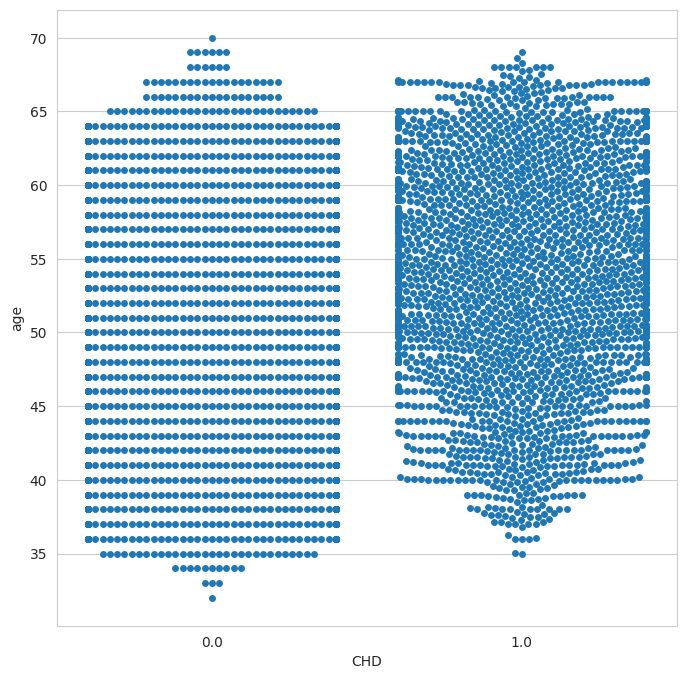

In [ ]:
# age v/s CHD
plt.figure(figsize=(8,8))
sns.swarmplot(x='CHD', y='age', data=train_data)

<Axes: xlabel='CHD', ylabel='age'>

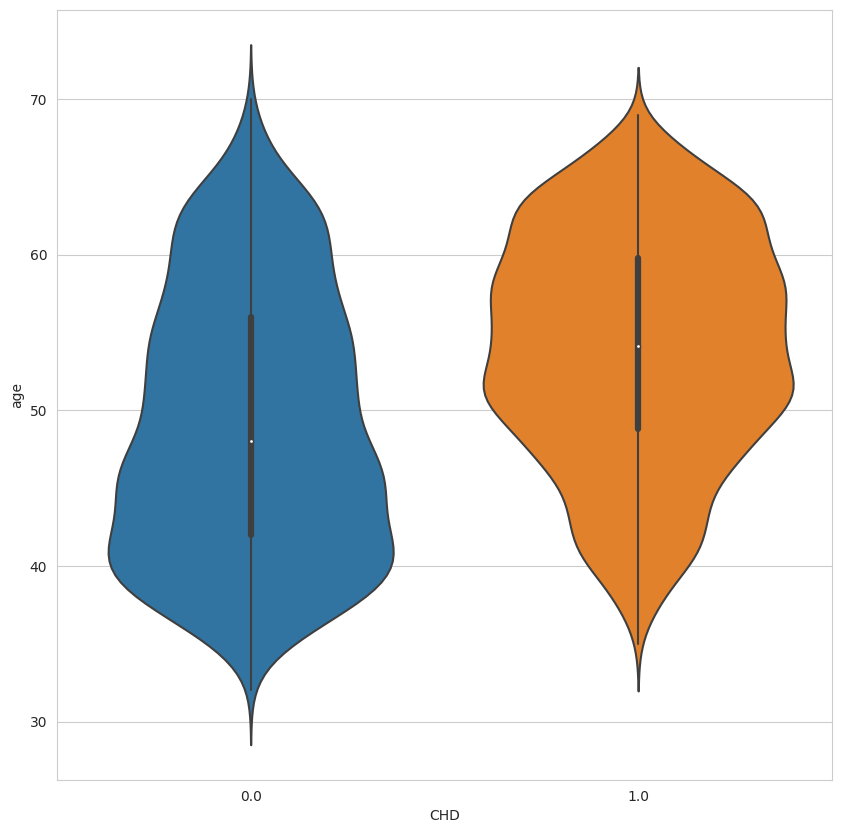

In [ ]:
plt.figure(figsize=(10,10))
sns.violinplot(x='CHD', y='age', data=train_data)

violin plot tells that most patients of age around 40-55 have risk 0



Most patients of age around 60-65 have risk of disease(CHD)

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='CHD', ylabel='age'>

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 49.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


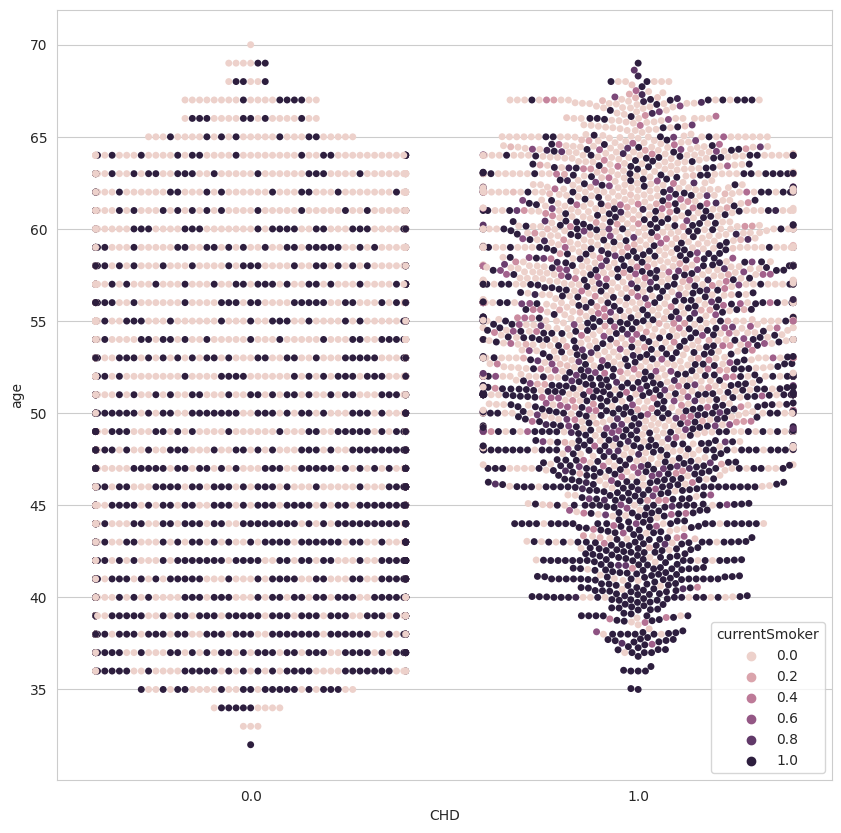

In [ ]:
# age vs CHD for smokers or non- smokers
plt.figure(figsize=(10,10))
sns.swarmplot(x='CHD', y='age', data=train_data, hue='currentSmoker')

for the age group of 40-50 most of the patients are smokers.

In [ ]:
#plt.figure(figsize=(10,10))
#sns.violinplot(x='CHD', y='age', data=train_data, hue='currentSmoker', split=True)

If we look upto the peaks

We see most of the smokers having no risk of CHD in age around 40yrs

Most of non-smokers having risk are in age group 65-70 yrs

Also most of the smokers having risk are in age aroung 50yrs

for the smokers who are in 40s whiil get risk of CHD in their 50s

<Axes: xlabel='male', ylabel='count'>

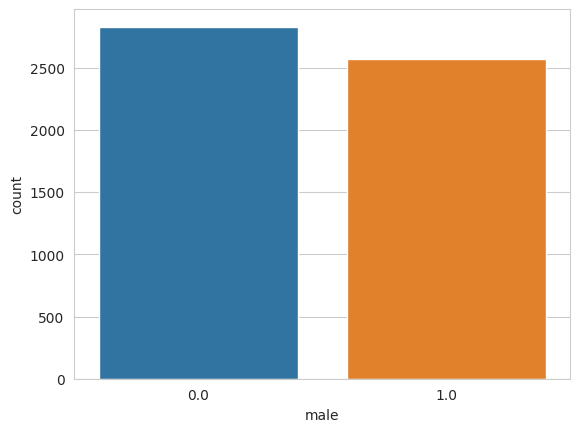

In [ ]:
# male and female countplot
sns.countplot(x=train_data['male'])

<Axes: xlabel='male', ylabel='count'>

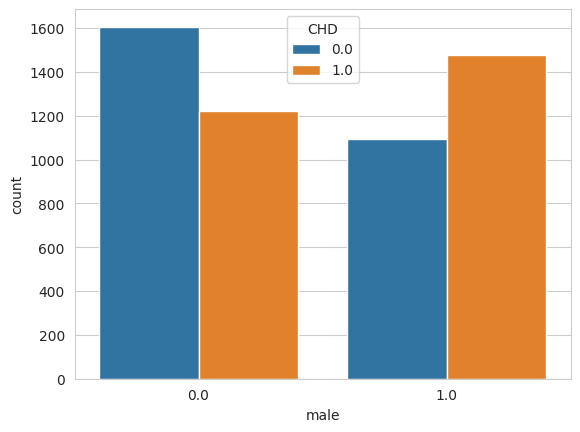

In [ ]:
# male and female having disease or not
sns.countplot(x=train_data['male'], hue=train_data['CHD'])

From above countplot

Most of the data are for females

More females having no risk than males having no risk

There are slightly more males having risk than females havinf risk

In [ ]:
train_data.iloc[:,:5]

,male,age,currentSmoker,cigsPerDay,BPMeds
0,0.0,63.000000,0.000000,0.000000,0.0
1,0.0,57.000000,1.000000,10.000000,0.0
2,0.0,45.000000,0.000000,0.000000,0.0
3,0.0,46.000000,1.000000,23.000000,0.0
4,0.0,51.000000,1.000000,15.000000,0.0
...,...,...,...,...,...
5391,0.0,55.589027,0.136991,1.506900,0.0
5392,0.0,56.041063,1.000000,3.054812,0.0
5393,0.0,52.296811,0.851594,7.664349,0.0
5394,0.0,51.931629,0.008546,0.076918,1.0


<Figure size 2000x1500 with 0 Axes>

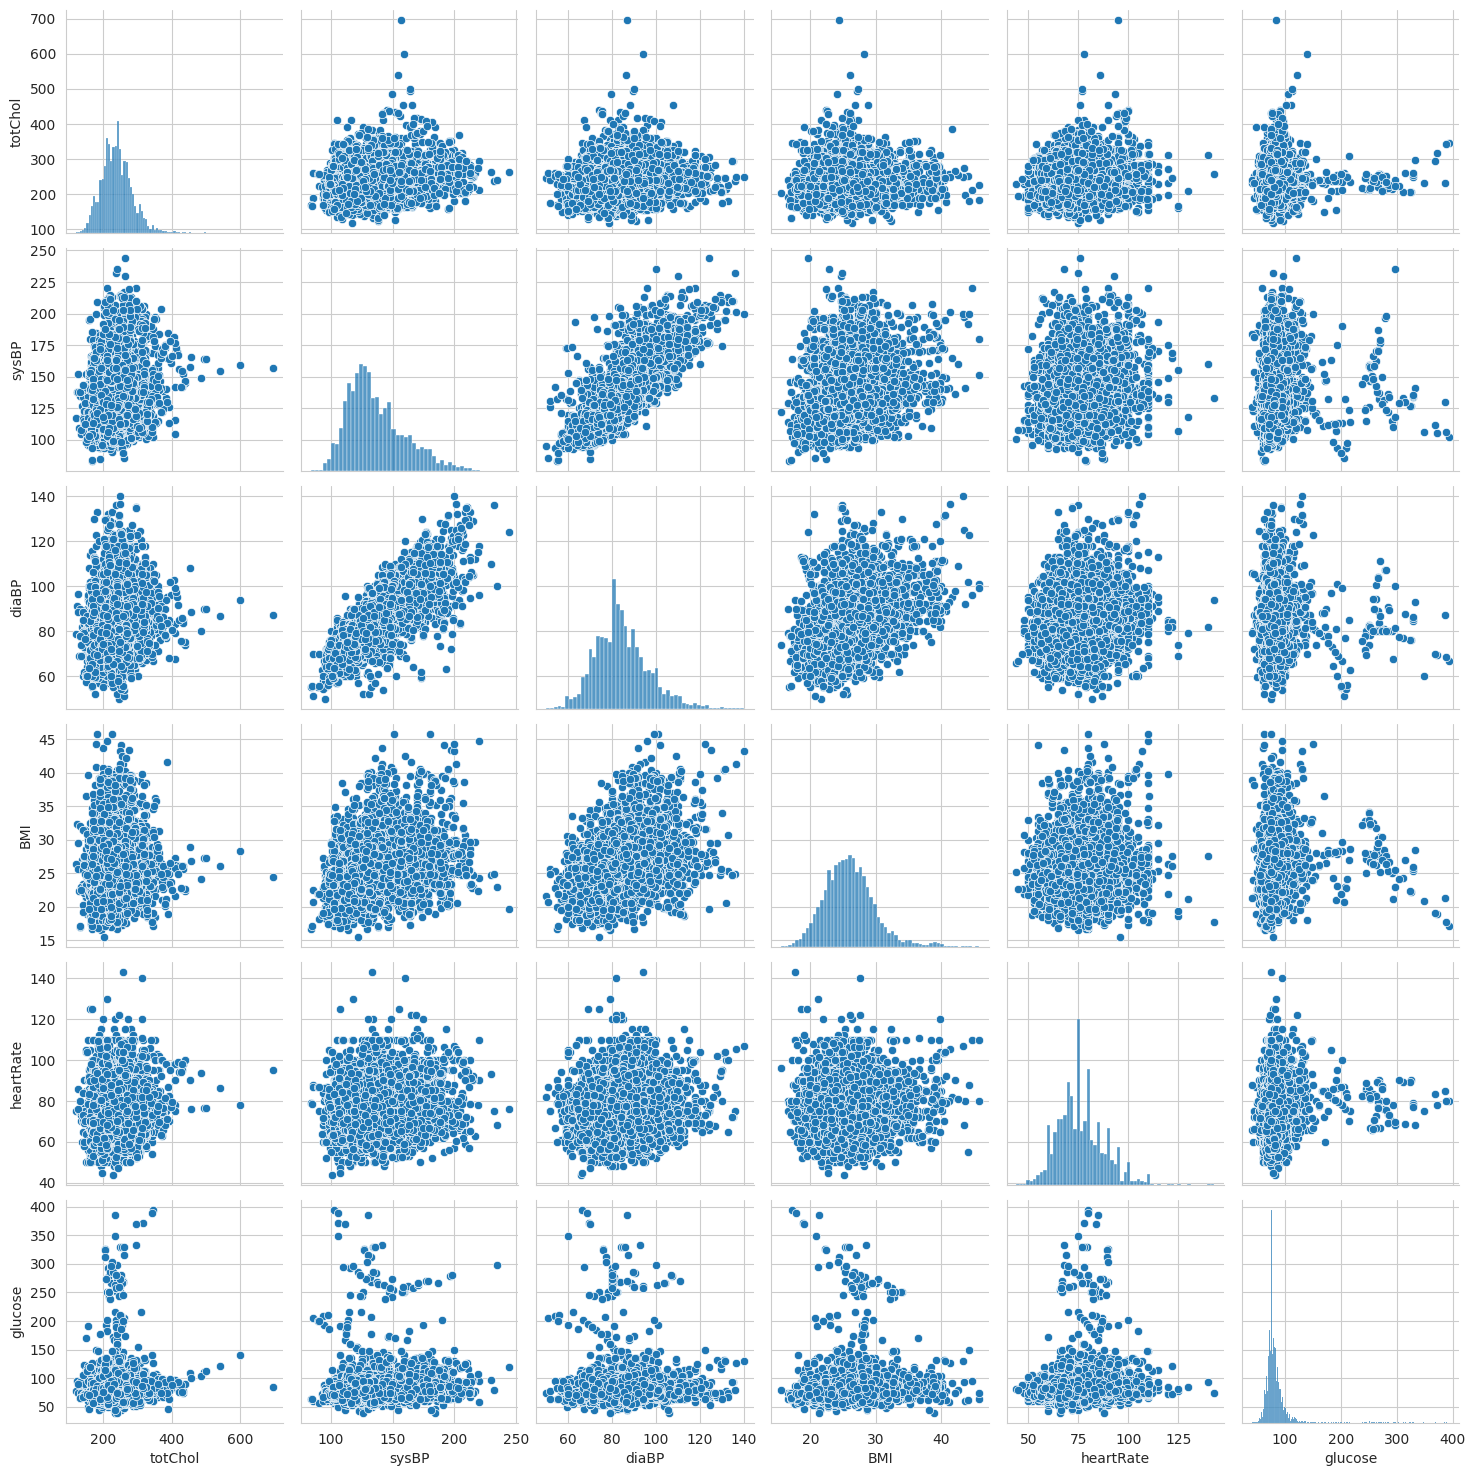

In [ ]:
# To understand correlation between some features, pair plot is used
plt.figure(figsize=(20,15))
sns.pairplot(train_data.loc[:,'totChol':'glucose'])

<Axes: >

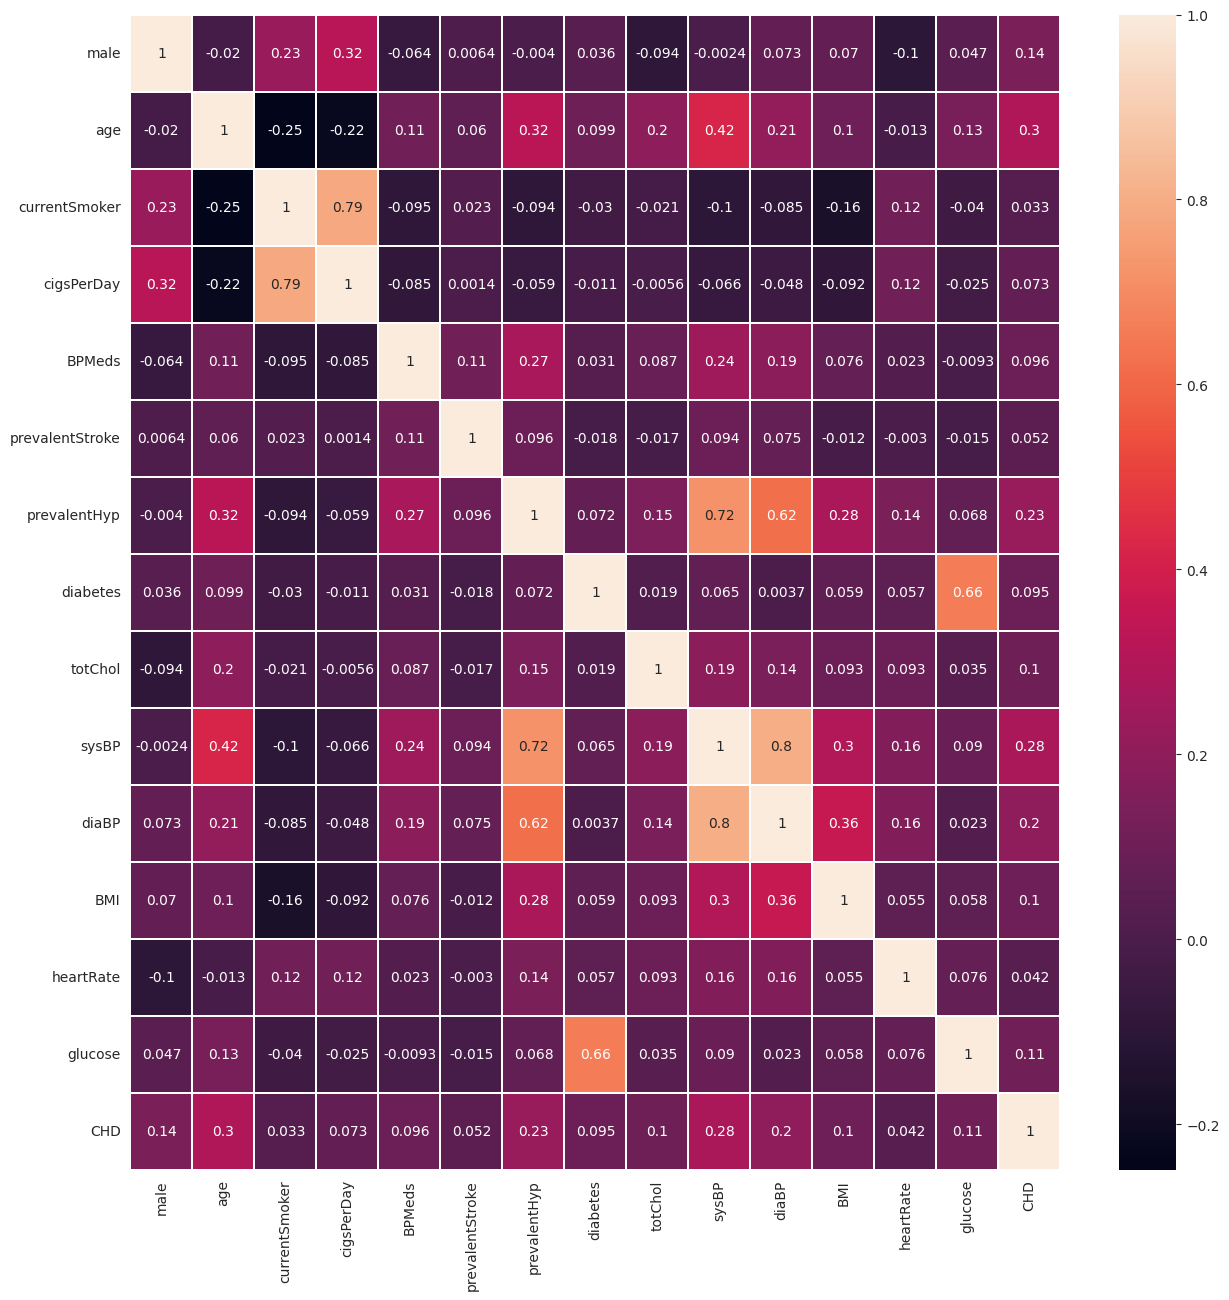

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(train_data.corr(), annot=True, linewidth=0.1)

In [ ]:
# dropping features which are highly correlated
features_to_drop = ['currentSmoker', 'diaBP']

train_data.drop(features_to_drop, axis=1, inplace = True)
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,276.0,134.0,23.64,70.0,86.0,0.0
1,0.0,57.0,10.0,0.0,0.0,1.0,0.0,238.0,133.0,18.09,100.0,115.0,0.0
2,0.0,45.0,0.0,0.0,0.0,0.0,0.0,250.0,116.0,28.59,93.0,87.0,0.0
3,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
4,0.0,51.0,15.0,0.0,0.0,0.0,0.0,352.0,136.5,25.79,73.0,67.0,0.0


**Outliers Checking**

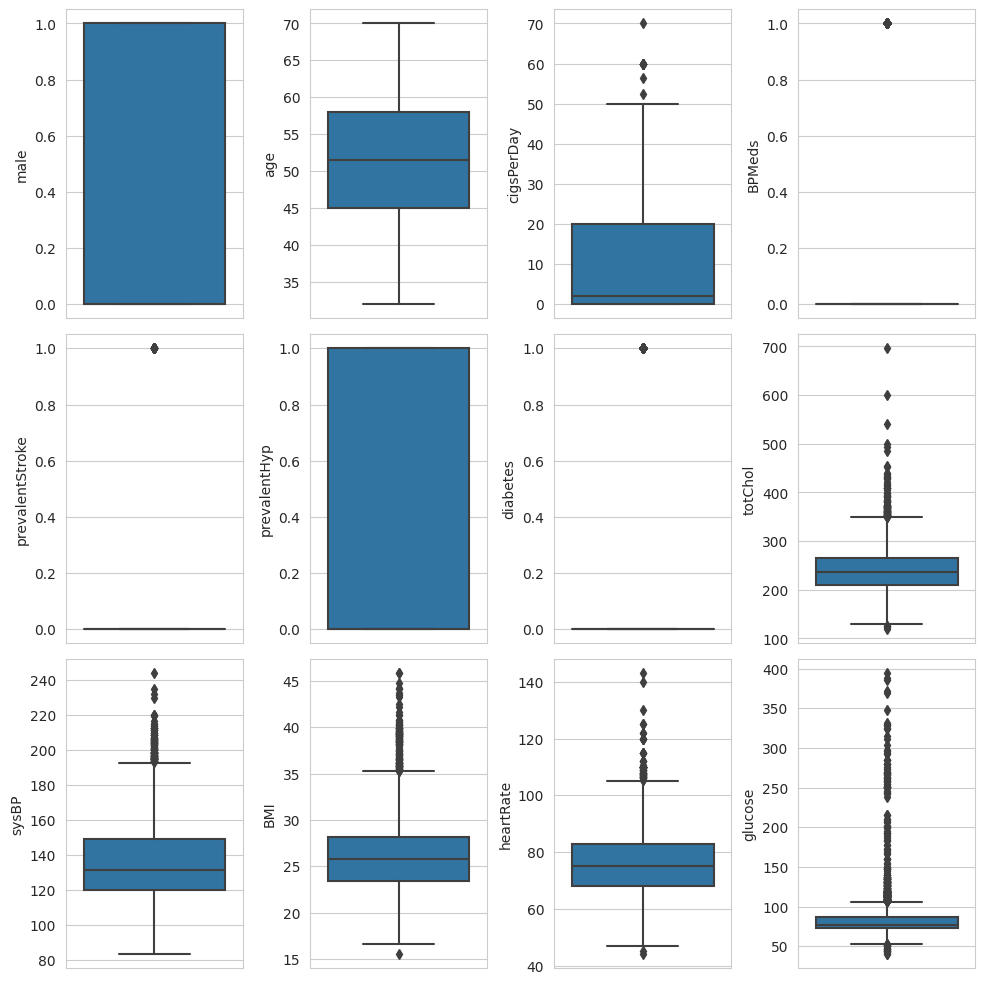

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten()

i=0
for k,v in train_data.items():
  sns.boxplot(y=v, ax=ax[i])
  i+=1
  if i==12:
    break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

Conclusion of BoxPlot:

Outliers found in features named['totChol','sysBP','BMI','heartRate','glucose']

In [ ]:
#Outliers handling
print('Number of training examples to deleteed for outliers removal is ',len(data[data['sysBP']>220]) + len(data[data['heartRate']>125]) + len(data[data['glucose']>200]) + len(data[data['totChol']>450]))

Number of training examples to deleteed for outliers removal is  48


In [ ]:
# deleting outliers

train_data = train_data[~(train_data['sysBP']>220)]
train_data = train_data[~(train_data['BMI']>43)]
train_data = train_data[~(train_data['heartRate']>225)]
train_data = train_data[~(train_data['glucose']>200)]
train_data = train_data[~(train_data['totChol']>450)]
print(train_data.shape)

(5312, 13)


**NORMALIZATION CHECKING**

<ipython-input-26-5c8e276d2fc1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax[i])
<ipython-input-26-5c8e276d2fc1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=ax[i])
<ipython-input-26-5c8e276d2fc1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in

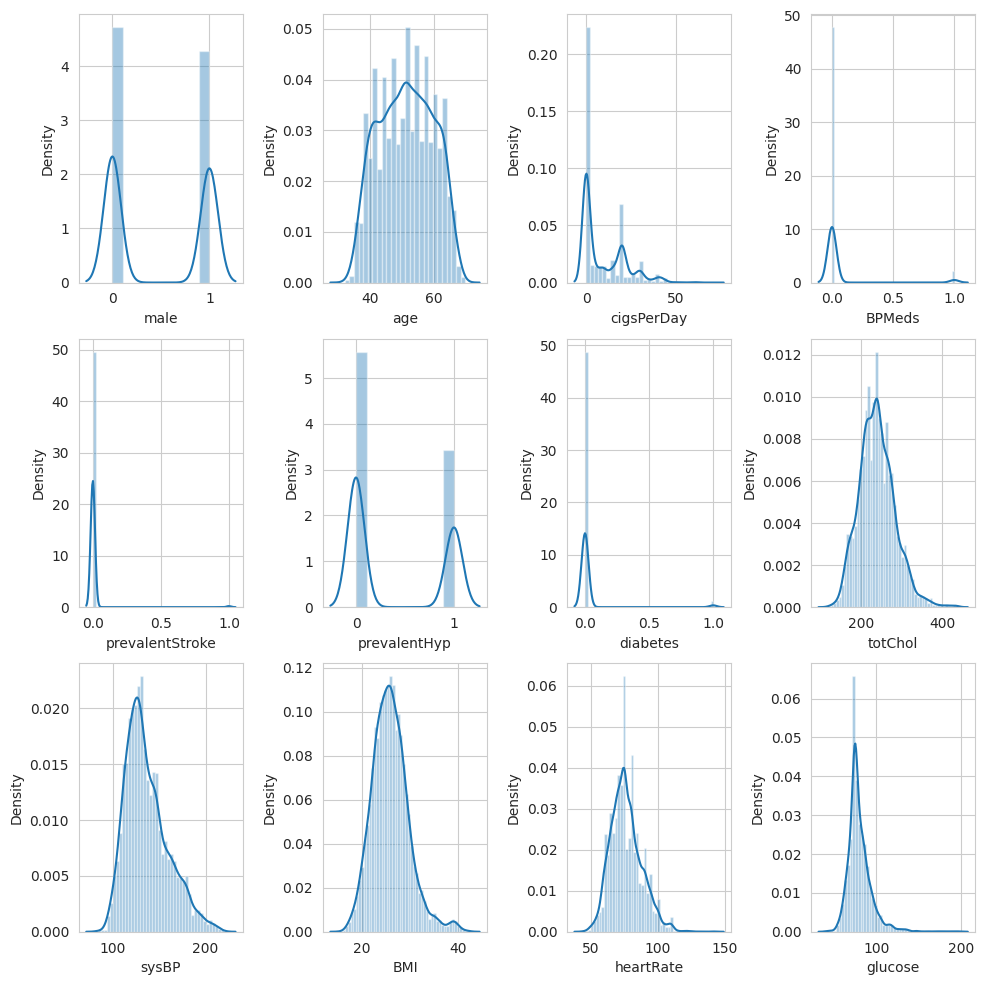

In [ ]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=4)
ax = ax.flatten() # plot size and orientation

i = 0
for k,v in train_data.items():
    sns.distplot(v, ax=ax[i])
    i+=1
    if i==12:
        break
plt.tight_layout(pad=1.25, h_pad=0.8, w_pad=0.8)

In [ ]:
# Standardise some features

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols_to_standardise = ['age','totChol','sysBP','BMI','heartRate','glucose','cigsPerDay']
train_data1 = train_data.copy();
train_data1[cols_to_standardise] = scaler.fit_transform(train_data1[cols_to_standardise])

In [ ]:
train_data.head()

,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
0,0.0,63.0,0.0,0.0,0.0,0.0,0.0,276.0,134.0,23.64,70.0,86.0,0.0
1,0.0,57.0,10.0,0.0,0.0,1.0,0.0,238.0,133.0,18.09,100.0,115.0,0.0
2,0.0,45.0,0.0,0.0,0.0,0.0,0.0,250.0,116.0,28.59,93.0,87.0,0.0
3,0.0,46.0,23.0,0.0,0.0,0.0,0.0,285.0,130.0,23.10,85.0,85.0,0.0
4,0.0,51.0,15.0,0.0,0.0,0.0,0.0,352.0,136.5,25.79,73.0,67.0,0.0


**Test_data**

In [ ]:
# dropping unwanted features as done in train data
test_data.drop(["education"],axis=1,inplace=True)
test_data.drop(features_to_drop, axis=1, inplace=True)
test_data.rename(columns={"TenYearCHD": "CHD"}, inplace=True)
# imputing missing values if any
imputer = SimpleImputer(strategy='most_frequent')
new_test_data = pd.DataFrame(imputer.fit_transform(test_data))
new_test_data.columns = test_data.columns
new_test_data.index = test_data.index

test_data = new_test_data.copy()

In [ ]:
# Standardising features
scaler1 = StandardScaler()
test_data1 = test_data.copy()
test_data1[cols_to_standardise] = scaler.fit_transform(test_data1[cols_to_standardise])

In [ ]:
test_data1.head()


,male,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,CHD
534,1.0,-1.554431,-0.754279,0.0,0.0,1.0,0.0,-1.246868,0.531902,1.204466,-0.291191,-0.460093,0.0
2751,1.0,-1.201252,0.963306,0.0,0.0,0.0,0.0,1.110291,-0.572580,0.584128,1.631679,-0.138745,0.0
3599,0.0,-0.612621,0.963306,0.0,0.0,1.0,0.0,0.767016,1.525937,-1.104436,0.795649,-0.210156,0.0
518,1.0,-1.672157,0.963306,0.0,0.0,0.0,0.0,-0.125501,-0.484222,-0.745167,-0.291191,0.361129,0.0
3813,0.0,-0.612621,-0.754279,0.0,0.0,0.0,0.0,0.469510,-0.174967,0.399704,-0.040382,-0.245861,0.0


**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
X_train = train_data1.iloc[:,:-1]
y_train = train_data1.iloc[:,-1]
X_test = test_data1.iloc[:,:-1]
y_test = test_data1.iloc[:,-1]

In [ ]:
log_reg.fit(X_train,y_train)
y_pred_log = log_reg.predict(X_test)

In [ ]:
data_test_1=[[1,65,1,1,1,1,1,195,106,21.02,80,77]]
# Standardising features
# scaler = StandardScaler()
# data_test_1 = scaler.fit_transform(data_test_1)
# print(data_test_1)

In [ ]:
print(log_reg.predict(data_test_1)[0])

1.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
log_reg_accuracy = accuracy_score(y_pred_log, y_test) * 100
print('Accuracy Score for logistic regression is %f'%log_reg_accuracy)

Accuracy Score for logistic regression is 61.792453


In [ ]:
log_train_score = log_reg.score(X_train,y_train)*100
print('Train score for Logistic Regression is %f'%log_train_score)

Train score for Logistic Regression is 67.545181


In [ ]:
print('Difference between train and test score for Logistic Regression is %f'%(log_train_score - log_reg_accuracy))

Difference between train and test score for Logistic Regression is 5.752728


In [ ]:
confusion_matrix(y_pred_log,y_test)


array([[530,  37],
       [368, 125]])

In [ ]:
print(classification_report(y_pred_log, y_test))

              precision    recall  f1-score   support

         0.0       0.59      0.93      0.72       567
         1.0       0.77      0.25      0.38       493

    accuracy                           0.62      1060
   macro avg       0.68      0.59      0.55      1060
weighted avg       0.67      0.62      0.56      1060



**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
dt_classifier = DecisionTreeClassifier()

# Define hyperparameters and their respective distributions for random search
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 9),  # Random integer values from 1 to 9
    'min_samples_split': randint(2, 200),  # Random integer values from 2 to 200
    'min_samples_leaf': randint(1, 100)  # Random integer values from 1 to 100
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(dt_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Train the final model with the best hyperparameters
final_model = DecisionTreeClassifier(**best_params)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_dt = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_dt)

print("Best Hyperparameters:", best_params)
print("Accuracy on Test Set:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 132}
Accuracy on Test Set: 0.7018867924528301


In [ ]:
print(final_model.predict([[1,18,0,0,0,0,0,195,106,21.02,80,77]])[0])

0.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
dt_accuracy= accuracy_score(y_pred_dt, y_test)*100
print('Accuracy score for Decision tree is %f'%dt_accuracy)

Accuracy score for Decision tree is 70.188679


In [ ]:
dt_train_score = final_model.score(X_train, y_train)*100
print('Train score for Decision tree is %f'%dt_train_score)

Train score for Decision tree is 75.112952


In [ ]:
print('Difference between train and test scores for Decision tree is %f'%(dt_train_score - dt_accuracy))

Difference between train and test scores for Decision tree is 4.924273


In [ ]:
confusion_matrix(y_pred_dt, y_test)

array([[666,  84],
       [232,  78]])

In [ ]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

         0.0       0.74      0.89      0.81       750
         1.0       0.48      0.25      0.33       310

    accuracy                           0.70      1060
   macro avg       0.61      0.57      0.57      1060
weighted avg       0.67      0.70      0.67      1060



**RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
rf_classifier = RandomForestClassifier()

# Define hyperparameters and their respective distributions for random search
param_dist = {
    'n_estimators': randint(10, 200),  # Random integer values from 10 to 200
    'criterion': ['gini', 'entropy'],
    'max_depth': randint(1, 9),
    'min_samples_split': randint(2, 200),
    'min_samples_leaf': randint(1, 100),
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search_rf = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search_rf.fit(X_train, y_train)

# Get the best hyperparameters
best_params_rf = random_search.best_params_

# Train the final model with the best hyperparameters
final_model_rf = RandomForestClassifier(**best_params_rf)
final_model_rf.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_rf = final_model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)

print("Best Hyperparameters:", best_params_rf)
print("Accuracy on Test Set:", accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 132}
Accuracy on Test Set: 0.6933962264150944


In [ ]:
final_model_rf.fit(X_train, y_train)
y_pred_rf = final_model_rf.predict(X_test)

In [ ]:
rf_accuracy = accuracy_score(y_pred_rf, y_test)*100
print('Accuracy score for Random Forest is %f'%rf_accuracy)

Accuracy score for Random Forest is 70.000000


In [ ]:
rf_train_score = final_model_rf.score(X_train, y_train)*100
print('Train score for Random Forest is %f'%rf_train_score)

Train score for Random Forest is 75.960090


In [ ]:
print('Difference between train and test scores for Random Forest is : %f'%(rf_train_score - rf_accuracy))

Difference between train and test scores for Random Forest is : 5.960090


In [ ]:
confusion_matrix(y_pred_rf, y_test)

array([[653,  73],
       [245,  89]])

In [ ]:
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

         0.0       0.73      0.90      0.80       726
         1.0       0.55      0.27      0.36       334

    accuracy                           0.70      1060
   macro avg       0.64      0.58      0.58      1060
weighted avg       0.67      0.70      0.66      1060



**Ensemble_model**

In [ ]:
import xgboost as xgb

In [ ]:
X_train = train_data.iloc[:,:-1]
y_train = train_data.iloc[:,-1]
X_test = test_data.iloc[:,:-1]
y_test = test_data.iloc[:,-1]

In [ ]:
model = xgb.XGBClassifier(objective="multi:softmax", num_class=len(set(y)), random_state=42)

In [ ]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.7971698113207547
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.88       898
         1.0       0.23      0.14      0.18       162

    accuracy                           0.80      1060
   macro avg       0.54      0.53      0.53      1060
weighted avg       0.76      0.80      0.78      1060



In [ ]:
import pickle
file = open('model.pkl', 'wb')
pickle.dump(final_model,file)

model = open('model.pkl', 'rb')
tree = pickle.load(model)

y_prediction = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_prediction)
print(accuracy)

0.7018867924528301


**CONCLUSION**

Why to choose an algorithm